In [1]:
### Import libraries
import pandas as pd # primary data structure library

# Downloading Data 

In [82]:
! git clone https://github.com/CSSEGISandData/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [3]:
### Select data path
fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

# Exploring USA Data cases

In [4]:
df1.shape

(3340, 249)

view the dataframe

In [5]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1065,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447,1619
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3443,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800,5003
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,569,573,575,576,579,581,586,590,598,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622,626,809
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,416,426,438,442,444,453,457,465,469,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578,581,612
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,774,788,800,812,816,825,835,848,854,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128,1487


How to find out the columns?

In [6]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20',
       '9/13/20', '9/14/20', '9/15/20'],
      dtype='object', length=249)

In [7]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,371,370,374,370,372,373,375,383,385,389,390,393,394,398,399,401,409,409,412,417,417,424,425,429,430,430,433,435,440,440,447,447,450,451,453,462,465,470,476,478
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,274,274,278,277,279,278,278,277,276,276,277,278,283,283,283,283,283,283,283,289,289,292,292,295,298,301,303,305,308,308,308,308,309,308,310,310,310,311,312,312
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,73,73,73,73,0,0,0,0,0,0,0,0,0,0,0,2,2,2
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69,70,77,77,79,82,86,96,97,97,100,102,104,106,106,107,108,108,108,108,108,108,108,108,108,108,109,109,110,110,111,111,111,111,111,111,111,111,111,111
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,6,5,5,5,5,7,7,8,8,12,0,11,11,11,11,11,11,11,11,11,11,11,11,19,20,20,20,20,20,20,21,21,21,23,23,23,23


In [8]:
df1['Admin2'][3335:3340]

3335         Teton
3336         Uinta
3337    Unassigned
3338      Washakie
3339        Weston
Name: Admin2, dtype: object

In [9]:
df1.iloc[3335:3340, 4:7]

,FIPS,Admin2,Province_State
3335,56039.0,Teton,Wyoming
3336,56041.0,Uinta,Wyoming
3337,90056.0,Unassigned,Wyoming
3338,56043.0,Washakie,Wyoming
3339,56045.0,Weston,Wyoming


How to find out dataframe dimensions

In [10]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3340, 249)


How many "province states" are there in this data set?

In [11]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [13]:
df1.iloc[:, 11:].max().max()

255049

Find out the largest value for column '9/8/20'

In [14]:
df1["9/13/20"].max()

253985

## Find out which row has the largest value on '9/14/20'

In [15]:
df1.loc[df1['9/14/20']==254656]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
213,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,204258,206778,208563,210543,210874,214283,214425,218831,220867,221971,223230,224105,225827,227346,229054,230662,231695,232893,233777,235386,236986,238458,239756,240749,241768,242521,243935,244999,246407,247542,248334,248821,249241,249859,251024,252066,253176,253985,254656,255049


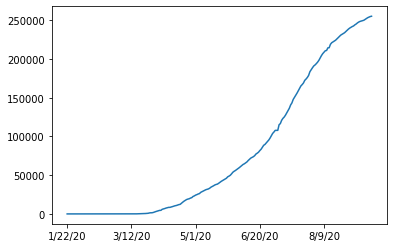

In [16]:
LA = df1.iloc[213, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [17]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/11/20,1420,4722,618
9/12/20,1432,4752,620
9/13/20,1442,4781,622
9/14/20,1447,4800,626


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55e53bb5c0>,
      dtype=object)

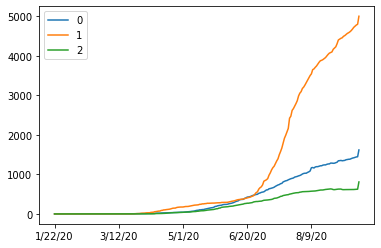

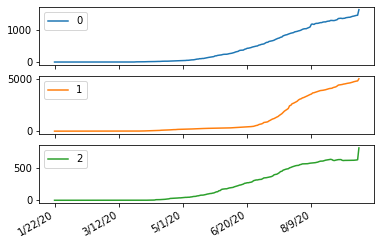

In [18]:

UScases.plot()
UScases.plot(subplots=True)

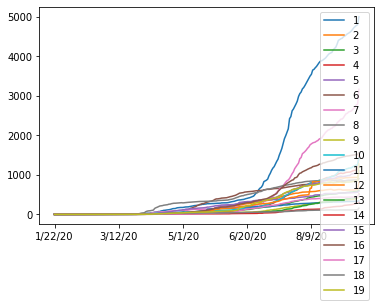

In [19]:
df1.iloc[1:20, 11:].transpose().plot()


## Add meaningful index to the dataframe

In [20]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3340)

In [21]:
df1.shape

(3340, 248)

In [22]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1065,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447,1619
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3443,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800,5003
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,569,573,575,576,579,581,586,590,598,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622,626,809
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,416,426,438,442,444,453,457,465,469,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578,581,612
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,774,788,800,812,816,825,835,848,854,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128,1487


In [23]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

(3340, 249)

In [24]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1065,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447,1619
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3443,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800,5003
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,569,573,575,576,579,581,586,590,598,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622,626,809
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,416,426,438,442,444,453,457,465,469,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578,581,612
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,774,788,800,812,816,825,835,848,854,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128,1487


In [25]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

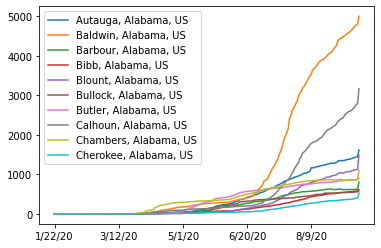

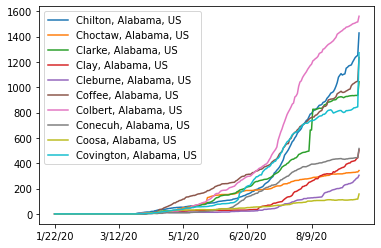

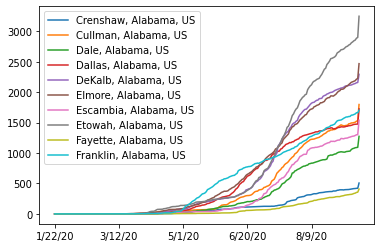

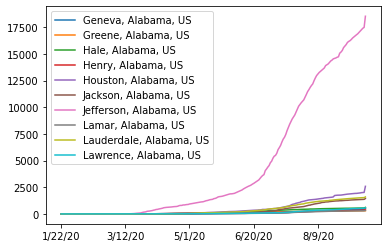

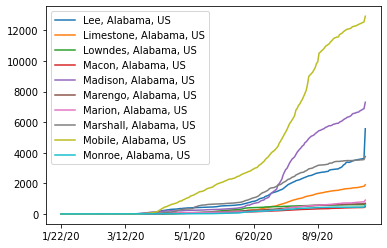

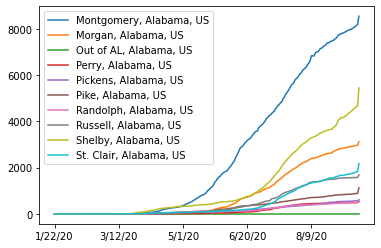

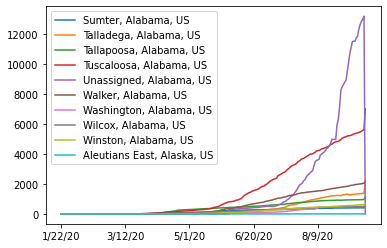

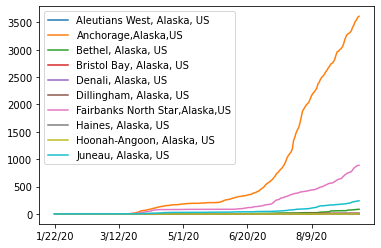

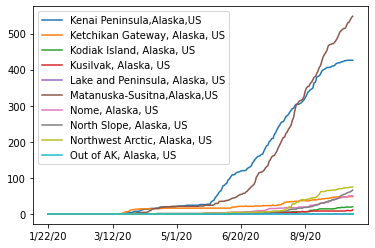

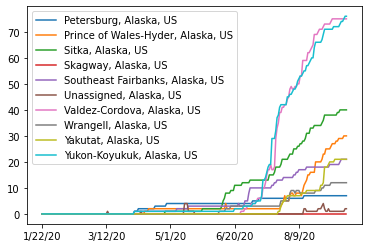

In [26]:
step = 10
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [27]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,371,370,374,370,372,373,375,383,385,389,390,393,394,398,399,401,409,409,412,417,417,424,425,429,430,430,433,435,440,440,447,447,450,451,453,462,465,470,476,478
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,274,274,278,277,279,278,278,277,276,276,277,278,283,283,283,283,283,283,283,289,289,292,292,295,298,301,303,305,308,308,308,308,309,308,310,310,310,311,312,312
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,73,73,73,73,0,0,0,0,0,0,0,0,0,0,0,2,2,2
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69,70,77,77,79,82,86,96,97,97,100,102,104,106,106,107,108,108,108,108,108,108,108,108,108,108,109,109,110,110,111,111,111,111,111,111,111,111,111,111
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,6,5,5,5,5,7,7,8,8,12,0,11,11,11,11,11,11,11,11,11,11,11,11,19,20,20,20,20,20,20,21,21,21,23,23,23,23


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

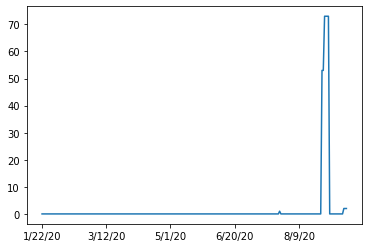

In [28]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [29]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape
df1.loc[ df1.index.str.contains('Unassigned'), ].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3474,3560,3599,3630,3925,3985,4061,4113,4223,4354,4409,4546,4694,4966,4966,4966,4966,5941,6288,7128,8229,8462,8605,8779,8906,9482,10019,10684,11104,11476,11499,11499,11727,11837,12298,12606,12823,12960,13160,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1,1,2,2,2,3,4,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1785,1772,1796,1823,1811,1801,1816,1835,742,755,774,785,786,774,805,813,810,826,820,794,806,815,901,904,904,897,956,1029,1230,1214,1227,1227,1209,1157,1117,1287,1544,1641,1628,1595
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [31]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [32]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [33]:
df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

TypeError: ignored

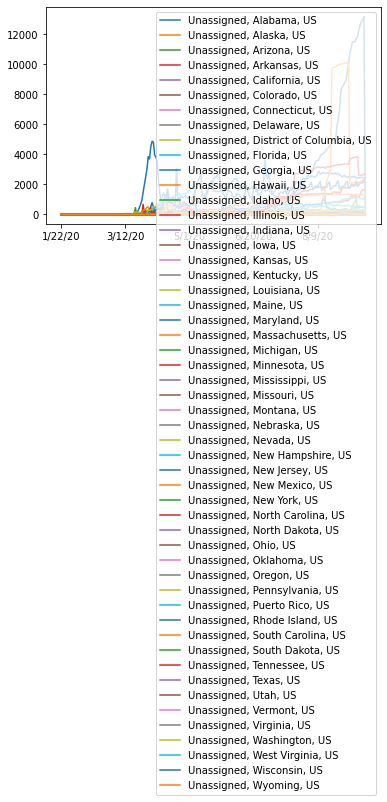

In [35]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

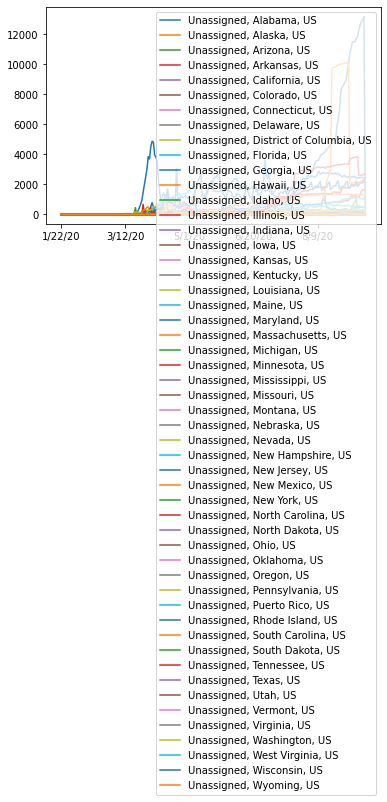

In [34]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [84]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5970,6062,6132,6220,6315,6408,6547,6605,6644,6801,6862,6995,7145,7223,7312,7373,7463,7496,7586,7689,7763,7863,7939,7965,7998,8136,8217,8294,8326,8427,8505,8563,8594,8640,8672,8718,8722,8765,8860,8924


In [86]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5970,6062,6132,6220,6315,6408,6547,6605,6644,6801,6862,6995,7145,7223,7312,7373,7463,7496,7586,7689,7763,7863,7939,7965,7998,8136,8217,8294,8326,8427,8505,8563,8594,8640,8672,8718,8722,8765,8860,8924


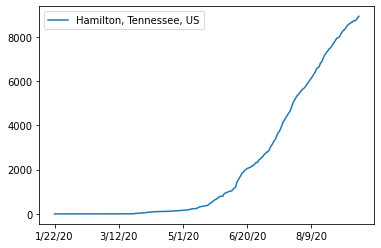

In [87]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

# How to examine the cases in each state? 

In [95]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3340, dtype: object

In [98]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [103]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [104]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98301,100173,101334,103020,103851,104786,105557,106309,107580,108433,109004,110361,111478,112449,113632,114532,115060,116710,117242,119254,121023,122185,123889,125235,126058,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565,136703,137646,138755,139459,141087
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3536,3613,3711,3774,3819,3879,3963,4073,4156,4259,4309,4371,4438,4520,4588,4677,4741,4810,4843,4895,4974,5092,5182,5226,5263,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012,6104,6207,6268,6343,6384
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,185053,186107,186923,187523,188737,189443,190794,191721,192654,193537,194005,194920,195557,196280,196899,197895,198103,198414,199273,199459,200139,200658,201287,201661,201835,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002,207523,208128,208512,208725,209209
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48039,48811,49383,50028,50411,51096,51766,52392,51992,52665,53077,53487,54216,54765,55652,56199,56574,56894,57374,58023,58745,59583,60378,60856,61224,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804,67911,69710,70219,70627,71497


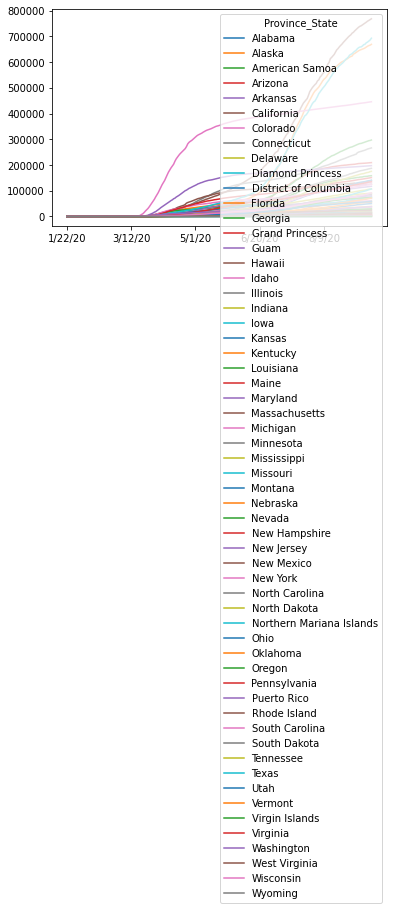

In [37]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55e31797f0>,
      dtype=object)

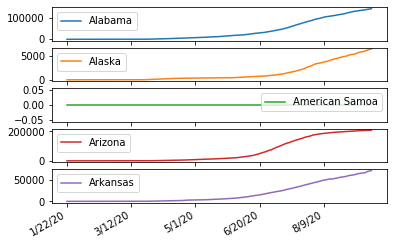

In [38]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d917ab38>],
      dtype=object)

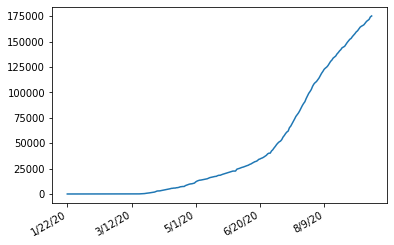

In [105]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [108]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98301,100173,101334,103020,103851,104786,105557,106309,107580,108433,109004,110361,111478,112449,113632,114532,115060,116710,117242,119254,121023,122185,123889,125235,126058,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565,136703,137646,138755,139459,141087
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3536,3613,3711,3774,3819,3879,3963,4073,4156,4259,4309,4371,4438,4520,4588,4677,4741,4810,4843,4895,4974,5092,5182,5226,5263,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012,6104,6207,6268,6343,6384
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,185053,186107,186923,187523,188737,189443,190794,191721,192654,193537,194005,194920,195557,196280,196899,197895,198103,198414,199273,199459,200139,200658,201287,201661,201835,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002,207523,208128,208512,208725,209209
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48039,48811,49383,50028,50411,51096,51766,52392,51992,52665,53077,53487,54216,54765,55652,56199,56574,56894,57374,58023,58745,59583,60378,60856,61224,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804,67911,69710,70219,70627,71497


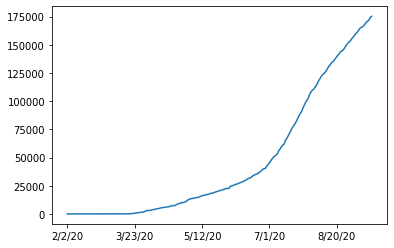

In [106]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

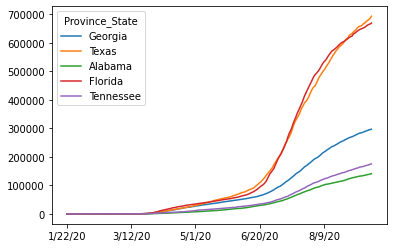

In [113]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

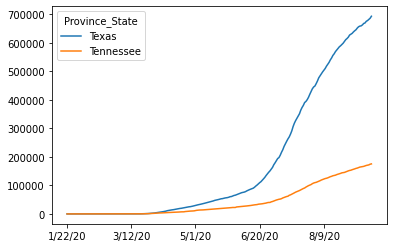

In [81]:
df_by_state.transpose()[['Texas', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

# How to examine the new cases daily? 

## diff() on a test dataframe

In [40]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [41]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [42]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2.0,2.0,2.0
1,NaN,2.0,2.0,4.0
2,NaN,2.0,2.0,2.0
3,NaN,2.0,2.0,2.0


## diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [43]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98301,100173,101334,103020,103851,104786,105557,106309,107580,108433,109004,110361,111478,112449,113632,114532,115060,116710,117242,119254,121023,122185,123889,125235,126058,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565,136703,137646,138755,139459,141087
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3536,3613,3711,3774,3819,3879,3963,4073,4156,4259,4309,4371,4438,4520,4588,4677,4741,4810,4843,4895,4974,5092,5182,5226,5263,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012,6104,6207,6268,6343,6384
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,185053,186107,186923,187523,188737,189443,190794,191721,192654,193537,194005,194920,195557,196280,196899,197895,198103,198414,199273,199459,200139,200658,201287,201661,201835,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002,207523,208128,208512,208725,209209
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48039,48811,49383,50028,50411,51096,51766,52392,51992,52665,53077,53487,54216,54765,55652,56199,56574,56894,57374,58023,58745,59583,60378,60856,61224,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804,67911,69710,70219,70627,71497


In [114]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1709.0,1872.0,1161.0,1686.0,831.0,935.0,771.0,752.0,1271.0,853.0,571.0,1357.0,1117.0,971.0,1183.0,900.0,528.0,1650.0,532.0,2012.0,1769.0,1162.0,1704.0,1346.0,823.0,1558.0,623.0,1046.0,1108.0,1410.0,511.0,659.0,633.0,811.0,1148.0,1138.0,943.0,1109.0,704.0,1628.0
Alaska,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,77.0,98.0,63.0,45.0,60.0,84.0,110.0,83.0,103.0,50.0,62.0,67.0,82.0,68.0,89.0,64.0,69.0,33.0,52.0,79.0,118.0,90.0,44.0,37.0,34.0,65.0,102.0,120.0,93.0,83.0,33.0,35.0,63.0,121.0,92.0,103.0,61.0,75.0,41.0
American Samoa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1397.0,1054.0,816.0,600.0,1214.0,706.0,1351.0,927.0,933.0,883.0,468.0,915.0,637.0,723.0,619.0,996.0,208.0,311.0,859.0,186.0,680.0,519.0,629.0,374.0,174.0,507.0,519.0,1092.0,728.0,836.0,250.0,197.0,81.0,496.0,461.0,521.0,605.0,384.0,213.0,484.0
Arkansas,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1011.0,772.0,572.0,645.0,383.0,685.0,670.0,626.0,-400.0,673.0,412.0,410.0,729.0,549.0,887.0,547.0,375.0,320.0,480.0,649.0,722.0,838.0,795.0,478.0,368.0,273.0,615.0,969.0,1094.0,515.0,687.0,350.0,294.0,385.0,398.0,1107.0,1799.0,509.0,408.0,870.0


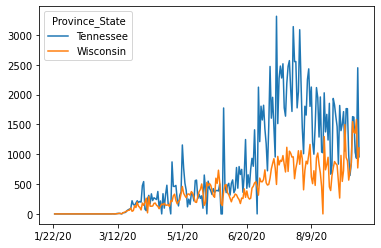

In [115]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [130]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.000000
1/26/20,0.000000,0.000000
...,...,...
9/11/20,1368.333333,92.000000
9/12/20,1428.333333,105.333333
9/13/20,1195.666667,85.333333
9/14/20,1471.666667,79.666667


In [132]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


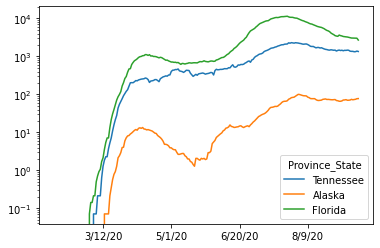

In [138]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55e2c783c8>,
      dtype=object)

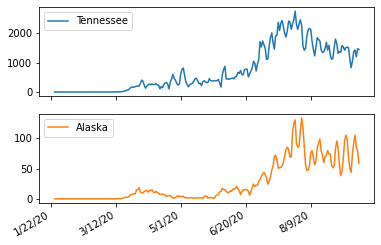

In [49]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

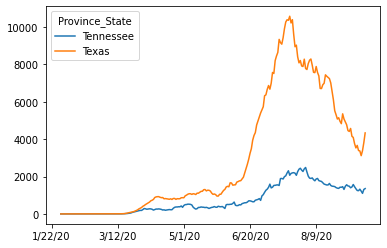

In [50]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


## Examine the daily confirmed cases in Hamilton County, TN

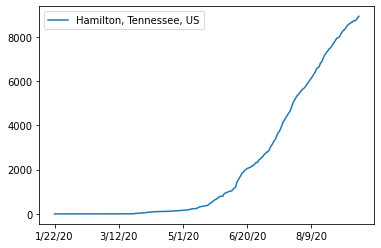

In [139]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [143]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5970,6062,6132,6220,6315,6408,6547,6605,6644,6801,6862,6995,7145,7223,7312,7373,7463,7496,7586,7689,7763,7863,7939,7965,7998,8136,8217,8294,8326,8427,8505,8563,8594,8640,8672,8718,8722,8765,8860,8924


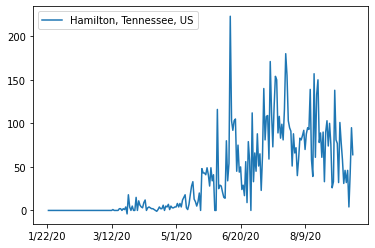

In [147]:
df_Hamilton.transpose().diff(axis=0).plot()

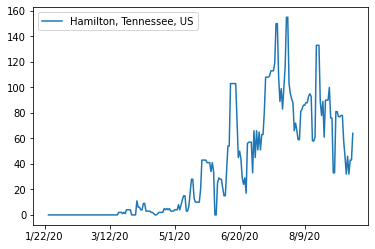

In [154]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

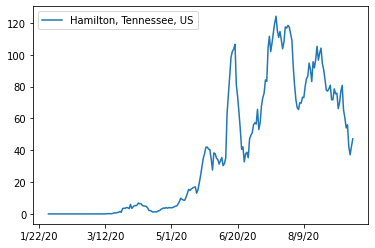

In [153]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

# Pick a time window using datetime

In [52]:
#from datetime import datetime 

df_dailycases_by_state2 = df_dailycases_by_state.transpose()

df_dailycases_by_state2.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_dailycases_by_state2.index = pd.to_datetime(df_dailycases_by_state2.index)
df_dailycases_by_state2.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13',
               '2020-09-14', '2020-09-15'],
              dtype='datetime64[ns]', length=238, freq=None)

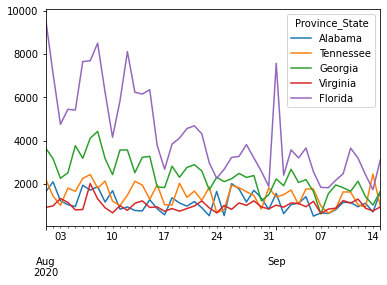

In [55]:
df_dailycases_by_state2.loc['2020-08-01':, ['Alabama', 'Tennessee', 'Georgia', 'Virginia', 'Florida']].plot()

## Examine the row with the largest value on 9/8/2020

In [ ]:
subset = df1.loc[df1['9/8/20']==249241]

In [ ]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [ ]:
type(subset)

pandas.core.frame.DataFrame

In [ ]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[]


In [ ]:
df1.iloc[5:10, -20:-1 ]

,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
5,527,527,526,527,530,535,536,537,541,540,541,541,544,545,545,545,548,550,551
6,805,804,809,813,814,827,835,837,840,839,841,848,853,857,859,859,862,863,863
7,2168,2179,2215,2225,2255,2316,2346,2377,2411,2413,2447,2503,2547,2558,2593,2602,2615,2652,2679
8,870,863,862,860,863,867,868,873,874,861,850,850,853,855,857,857,858,858,862
9,336,334,331,336,336,341,345,346,353,354,354,362,364,365,367,367,371,376,380


# Explore Global Data set

In [56]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20',
       '9/13/20', '9/14/20', '9/15/20'],
      dtype='object', length=242)

In [57]:
df2['Country/Region']
list(df2['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [58]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [59]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [60]:
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


In [61]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [62]:
### Check if the dataframe contains NaN values
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


In [63]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

Index(['US'], dtype='object', name='Country/Region')

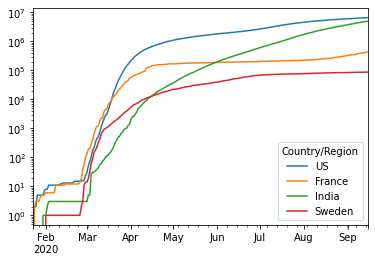

In [64]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


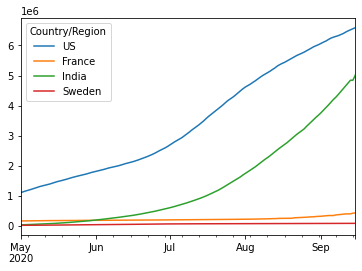

In [65]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)